In [1]:
%matplotlib inline

# Pytorch: Tensors

这次我们使用pytorch手动实现一个神经网络。

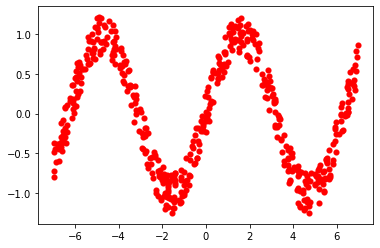

In [52]:
import torch
import matplotlib.pyplot as plt
import numpy as np

dtype = torch.float
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

# N是batch_size； D_in是输入的维度
# H是隐层的维度；D_out是输出的维度
N, D_in, H, D_out = 512, 1, 100, 1

#创建数据集，y通过sin函数计算并加上部分噪声
x = np.random.rand(N, D_in)
x = (x - 0.5) * 14
y = np.sin(x) + (np.random.rand(N, D_out) - 0.5) * 0.5
plt.scatter(x,y,color="red", linewidth=0.1)
x = torch.from_numpy(x).type(dtype).to(device)
y = torch.from_numpy(y).type(dtype).to(device)

epoch: 0 loss: 229289.015625
epoch: 1000 loss: 23.6109619140625
epoch: 2000 loss: 17.452434539794922
epoch: 3000 loss: 15.416476249694824
epoch: 4000 loss: 14.341984748840332
epoch: 5000 loss: 13.685443878173828
epoch: 6000 loss: 13.223451614379883
epoch: 7000 loss: 12.902328491210938
epoch: 8000 loss: 12.620368957519531
epoch: 9000 loss: 12.343164443969727
epoch: 10000 loss: 12.160377502441406
epoch: 11000 loss: 12.03776741027832
epoch: 12000 loss: 11.955391883850098
epoch: 13000 loss: 11.8916015625
epoch: 14000 loss: 11.843016624450684
epoch: 15000 loss: 11.800691604614258
epoch: 16000 loss: 11.764161109924316
epoch: 17000 loss: 11.733017921447754
epoch: 18000 loss: 11.70053482055664
epoch: 19000 loss: 11.662437438964844
epoch: 20000 loss: 11.631725311279297
epoch: 21000 loss: 11.6133451461792
epoch: 22000 loss: 11.597518920898438
epoch: 23000 loss: 11.581705093383789
epoch: 24000 loss: 11.566984176635742
epoch: 25000 loss: 11.552915573120117
epoch: 26000 loss: 11.536026000976562
epo

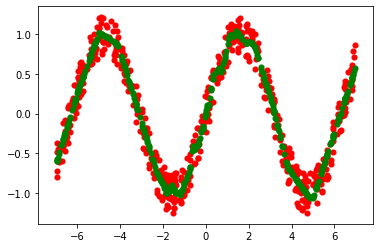

In [67]:
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
b1 = torch.randn(H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)
b2 = torch.randn(D_out, device=device, dtype=dtype)

lr_w = 1e-6
lr_b = 1e-5

for epoch in range(50000):
    h1 = x.mm(w1) + b1
    h2 = h1.clamp(min=0)
    y_pred = h2.mm(w2) + b2
    
    loss = (y_pred - y).pow(2).sum().item()
    if epoch % 1000 == 0:
        print("epoch:",epoch, "loss:", loss)
    
    dy = 2.0 * (y_pred - y)
    dw2 = h2.t().mm(dy)
    db2 = dy.sum(dim=0)
    dh2 = dy.mm(w2.t())
    dh1 = dh2.clone()
    dh1[h1<0] = 0
    dw1 = x.t().mm(dh1)
    db1 = dh1.sum(dim=0)
    
    w1 = w1 - lr_w * dw1
    b1 = b1 - lr_b * db1
    w2 = w2 - lr_w * dw2
    b2 = b2 - lr_b * db2

h1 = x.mm(w1) + b1
h2 = h1.clamp(min=0)
y_pred = h2.mm(w2) + b2
plt.scatter(x.cpu().numpy(),y.cpu().numpy(),color="red", linewidth=0.1)
plt.scatter(x.cpu().numpy(), y_pred.cpu().numpy(), color='green', linewidth=0.1)

In [68]:
w1 = w1.cpu().numpy()
b1 = b1.cpu().numpy()
w2 = w2.cpu().numpy()
b2 = b2.cpu().numpy()
np.savez('./two_layers_net_tensor.npz', w1=w1, b1=b1, w2=w2, b2=b2)


In [76]:
weights = np.load('./two_layers_net.npz')
w1 = weights['w1'].astype(np.float32)
b1 = weights['b1'].astype(np.float32)
w2 = weights['w2'].astype(np.float32)
b2 = weights['b2'].astype(np.float32)
w1 = torch.from_numpy(w1).to(device)
b1 = torch.from_numpy(b1).to(device)
w2 = torch.from_numpy(w2).to(device)
b2 = torch.from_numpy(b2).to(device)

def forward(x):
    h1 = x.mm(w1) + b1
    h2 = h1.clamp(min=0)
    y_pred = h2.mm(w2) + b2
    return y_pred

torch.float32


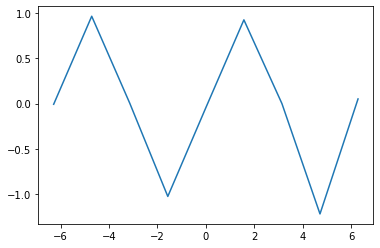

In [86]:
p = np.pi
x_test = torch.ones((9, 1), device=device, dtype=dtype)
for i in range(-4, 5, 1):
    x_test[i+4, 0] = i / 2 * p

y_groundtruth = torch.sin(x_test)
y_test = forward(x_test)
plt.plot(x_test.cpu().numpy(), y_test.cpu().numpy())

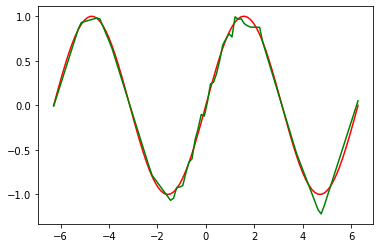

In [89]:
x_ = np.linspace(-2*p, 2*p, num=100)
x_ = x_.reshape((100, 1))
x_ = torch.from_numpy(x_).type(dtype).to(device)
y_true = torch.sin(x_)
y_ = forward(x_)
plt.plot(x_.cpu().numpy(), y_true.cpu().numpy(), color='r')
plt.plot(x_.cpu().numpy(), y_.cpu().numpy(), color='g')

这几乎与numpy实现的结果一模一样